In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/black-friday-sales-data/train.csv


In [2]:
!pip install miceforest
!pip install plotly
!pip install fancyimpute
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from fancyimpute import IterativeImputer  # MICE imputer
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=1d86ac50932d6c5dc3def846d195ff2fcff7c8c5239a4270099b73327cc6ac15
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=6507799848c299810374d616f6c02f9e2448c3a02b3b5d30965fa0f4c7049fee
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [3]:
df = pd.read_csv("/kaggle/input/black-friday-sales-data/train.csv")

In [4]:
# Data Preview
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# count of unique data in columns
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [7]:
# Total null values in each columns
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.shape

(550068, 12)

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#   Data Cleaning

Checking for duplicates.¶

In [10]:
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No Duplicate Row Exists")
else:
    print("Duplicate Rows Found")
    print(duplicate_rows) 



No Duplicate Row Exists



**Creating function checking the columns names, types , missing values number and number of unique values.**

In [11]:
def unique(df):
    # Initialize an empty list to store rows
    data = []

    # Loop through the columns in the dataframe
    for col in df.columns:
        # Get the number of unique values in the column
        num_unique = df[col].nunique()

        # Add the unique values as a list to the 'Unique_values' column if num_unique <= 10
        if num_unique <= 10:
            unique_vals = list(df[col].unique())
        else:
            unique_vals = "More than 10 unique values"

        # Get the data type of the column
        data_type = df[col].dtype

        # Count the number of missing values in the column
        num_missing = df[col].isnull().sum()
        percent_of_missing = round((num_missing / df.shape[0]) * 100, 2)

        # Append a dictionary with the column details to the list
        data.append({
            'Column_name': col,
            'Data_type': data_type,
            'Number_of_unique': num_unique,
            'Unique_values': unique_vals,
            'Number_of_missing': num_missing,
            'percent_of_missing': percent_of_missing
        })

    # Create a dataframe from the list of dictionaries
    df_unique = pd.DataFrame(data)

    return df_unique


In [12]:
unique(df)

,Column_name,Data_type,Number_of_unique,Unique_values,Number_of_missing,percent_of_missing
0,User_ID,int64,5891,More than 10 unique values,0,0.00
1,Product_ID,object,3631,More than 10 unique values,0,0.00
2,Gender,object,2,"[F, M]",0,0.00
3,Age,object,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]",0,0.00
4,Occupation,int64,21,More than 10 unique values,0,0.00
5,City_Category,object,3,"[A, C, B]",0,0.00
6,Stay_In_Current_City_Years,object,5,"[2, 4+, 3, 1, 0]",0,0.00
7,Marital_Status,int64,2,"[0, 1]",0,0.00
8,Product_Category_1,int64,20,More than 10 unique values,0,0.00
9,Product_Category_2,float64,17,More than 10 unique values,173638,31.57



# Mean VS Median VS Mice imputation

In [13]:
mean_value = df["Product_Category_2"].mean()
mean_imputation=df["Product_Category_2"].fillna(mean_value)

median_value = df["Product_Category_2"].median()
median_imputation = df["Product_Category_2"].fillna(median_value)

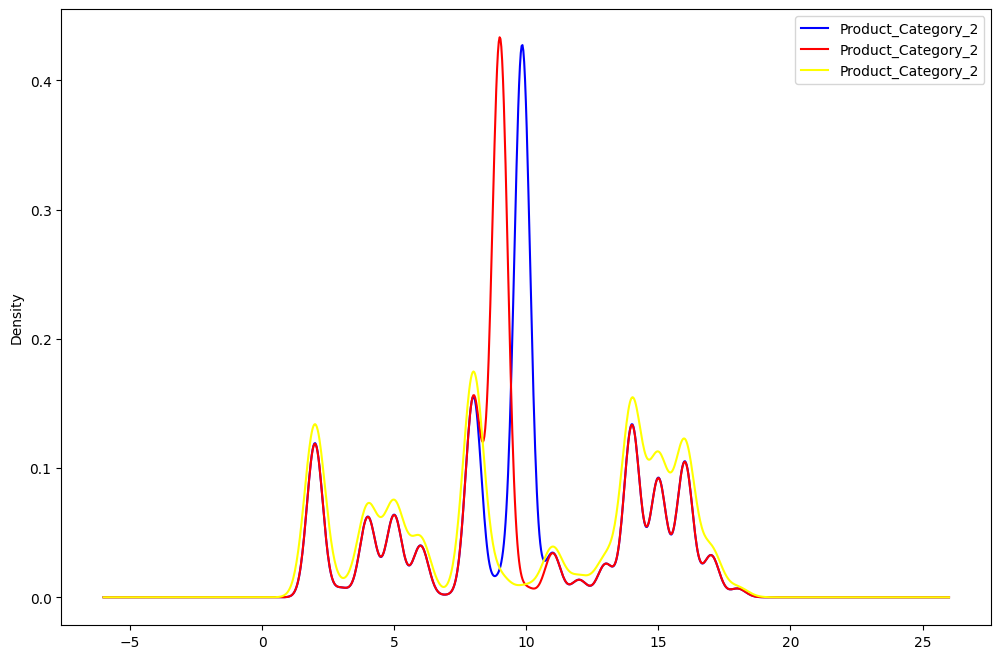

In [14]:

plt.figure(figsize=(12,8))

mean_imputation.plot(kind="kde" , color="blue")
median_imputation.plot(kind="kde" , color ="red")
df["Product_Category_2"].plot(kind="kde" , color ="yellow")
plt.legend()
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder
Black_df_clean_mice= df.drop(["Product_ID" ,"User_ID" ,"Gender" ,"Age" ,"City_Category" ,"Stay_In_Current_City_Years"] ,axis=1)
label_encoder_gender = LabelEncoder()
Black_df_clean_mice['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

label_encoder_age = LabelEncoder() 
Black_df_clean_mice['Age'] = label_encoder_age.fit_transform(df['Age'])
label_encoder_city = LabelEncoder()
Black_df_clean_mice['City_Category'] = label_encoder_city.fit_transform(df['City_Category'])
label_encoder_city = LabelEncoder()
Black_df_clean_mice['Stay_In_Current_City_Years'] = label_encoder_city.fit_transform(df['Stay_In_Current_City_Years'])

mice imputer

In [16]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(data = Black_df_clean_mice,random_state = 2023)

In [17]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,City_Category,Stay_In_Current_City_Years
0,10,0,3,11.0,8.0,8370,0,0,0,2
1,10,0,1,6.0,14.0,15200,0,0,0,2
2,10,0,12,15.0,17.0,1422,0,0,0,2
3,10,0,12,14.0,17.0,1057,0,0,0,2
4,16,0,8,8.0,16.0,7969,1,6,2,4


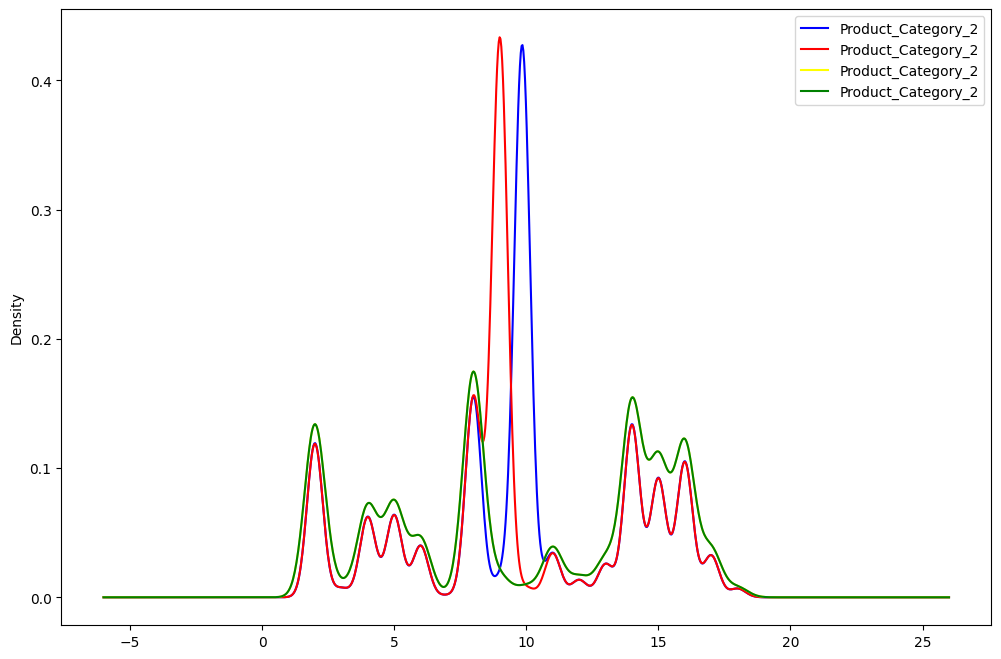

In [18]:
plt.figure(figsize=(12,8))

mean_imputation.plot(kind="kde" , color="blue")
median_imputation.plot(kind="kde" , color ="red")
Black_df_clean_mice["Product_Category_2"].plot(kind="kde" , color ="yellow") # mice (yellow)
df["Product_Category_2"].plot(kind="kde" , color="green") #original (green)
plt.legend()
plt.show()

## Handling Missing Data: Conclusion

When dealing with missing values, I tested a few different approaches to see which one would best preserve the original data distribution:

1. **Mean Imputation**:
    - I filled missing values with the average (mean) of the column.
    - Result: The imputed distribution didn't align well with the original distribution.

2. **Median Imputation**:
    - I used the middle value (median) of the column to fill in missing values.
    - Result: Similarly, this approach also failed to match the original distribution.

3. **MICE (Multiple Imputation by Chained Equations)**:
    - MICE is an advanced technique that uses all available data to predict missing values iteratively.
    - Since MICE requires numeric data, I performed quick encoding of categorical columns to numeric format.
    - Result: The imputed values using MICE matched the original data distribution almost perfectly! It was clear that MICE produced a far better result than simple mean or median imputation.



# Exploratory Data Analyses¶
=============================

    Describe the methodology you will follow to achieve your objectives, relatioships analysis ? feature engineering ?

    Apply your appraoch, and cite your findings.

    Draft a conclusion, and define new operations.

    Use visaluzation to understand your findings.


# univarite analysis

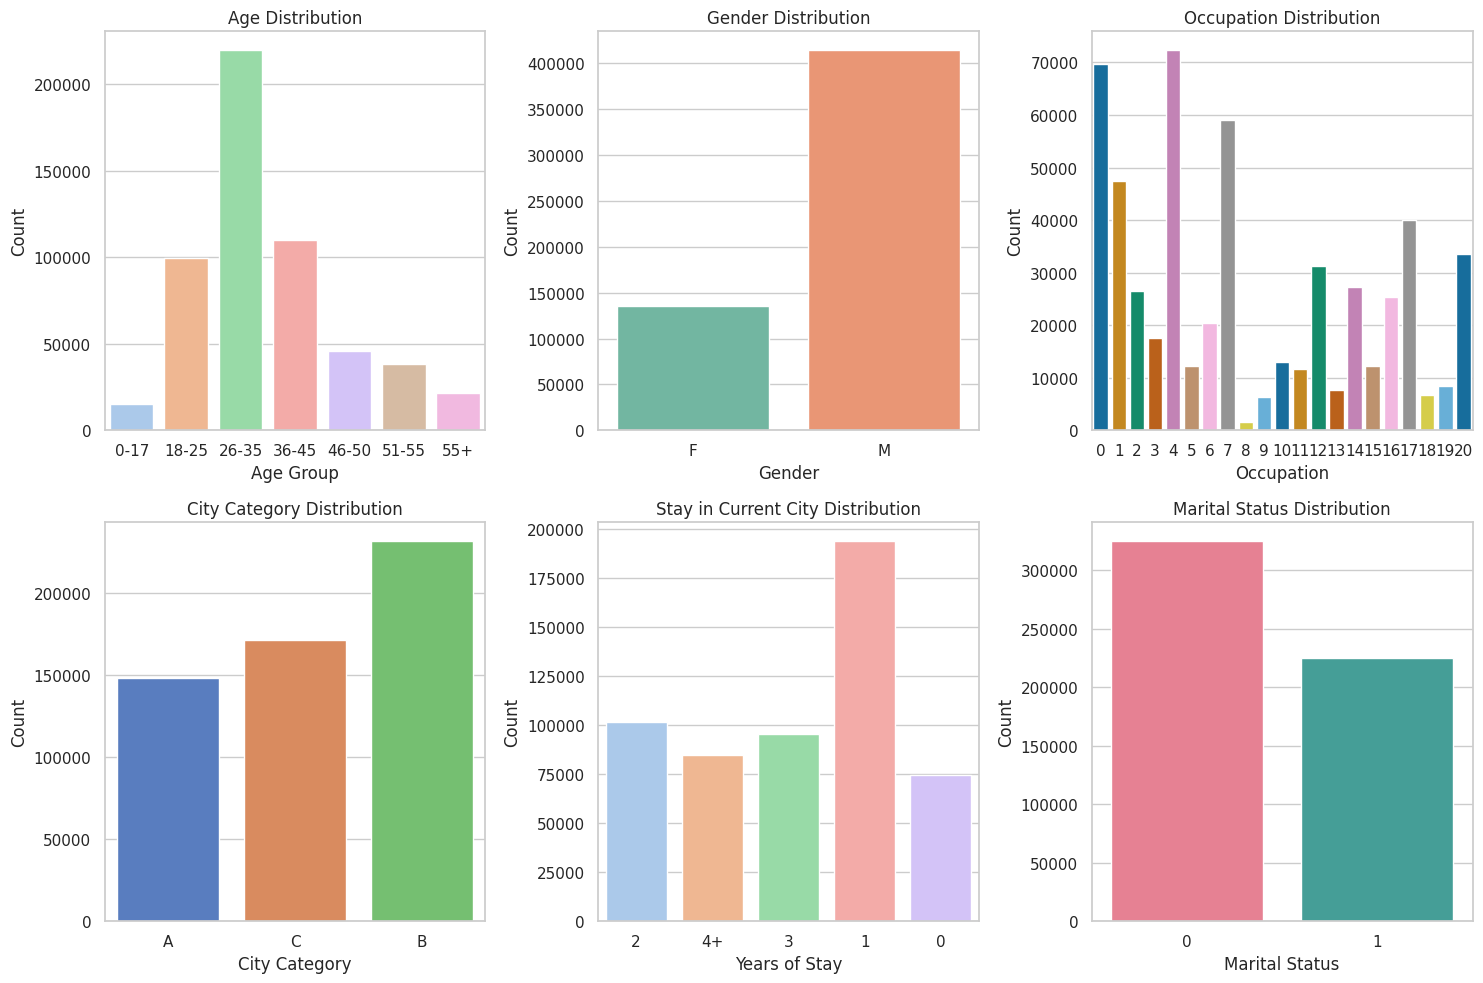

In [19]:
sns.set(style="whitegrid")  

# Set the figure size (15x10 inches)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Customize and create countplots

# Age Distribution
sns.countplot(x='Age', data=df, palette='pastel', ax=axes[0, 0], 
              order=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')

# Gender Distribution
sns.countplot(x='Gender', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Occupation Distribution
sns.countplot(x='Occupation', data=df, palette='colorblind', ax=axes[0, 2])
axes[0, 2].set_title('Occupation Distribution')
axes[0, 2].set_xlabel('Occupation')
axes[0, 2].set_ylabel('Count')

# City Category Distribution
sns.countplot(x='City_Category', data=df, palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('City Category Distribution')
axes[1, 0].set_xlabel('City Category')
axes[1, 0].set_ylabel('Count')

# Stay in Current City Distribution
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Stay in Current City Distribution')
axes[1, 1].set_xlabel('Years of Stay')
axes[1, 1].set_ylabel('Count')

# Marital Status Distribution
sns.countplot(x='Marital_Status', data=df, palette='husl', ax=axes[1, 2])
axes[1, 2].set_title('Marital Status Distribution')
axes[1, 2].set_xlabel('Marital Status')
axes[1, 2].set_ylabel('Count')

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

## Insights from Black Friday Shopping Dataset

The analysis of the Black Friday shopping dataset provides valuable insights into consumer behavior patterns and highlights several key demographic trends:

### Key Findings:
1. **Gender Distribution**:
   - Male shoppers outnumber female shoppers, indicating a potential gender imbalance in Black Friday participation.
   
2. **Age Group**:
   - The most active shoppers during Black Friday were in the 26-35 age group, making this the most prominent age demographic.

3. **City Category**:
   - City Category B saw the highest number of shoppers, emphasizing the importance of this location in the Black Friday retail landscape.

4. **Stay Duration**:
   - Individuals with a stay duration of **1 year** in their current city were the most engaged during Black Friday sales.

5. **Marital Status**:
   - Singles (Marital Status 0) were the largest group of shoppers, suggesting that singles are a major demographic during Black Friday.

### Recommendations for Retailers:
#### 1. **Targeted Gender-Based Campaigns**:
   - Design promotions and bundles that appeal specifically to both male and female shoppers.
   - Leverage gender-specific advertisements to enhance engagement.

#### 2. **Customized Age-Group Offers**:
   - Focus marketing efforts on the 26-35 age group.
   - Create tailored promotions and product recommendations for this segment, which forms the largest group of Black Friday shoppers.

#### 3. **City-Centric Marketing**:
   - Prioritize marketing campaigns for City Category B, the location with the highest shopper engagement.
   - Offer location-specific promotions to boost sales in this category.

#### 4. **Appealing to New Residents**:
   - Tailor marketing strategies to individuals with a stay duration of 1 year, offering exclusive deals for newcomers.
   - Offer welcome packages or introductory discounts to entice new residents to participate.

#### 5. **Singles-Focused Promotions**:
   - Create campaigns that cater to the interests and needs of singles (Marital Status 0).
   - Promote products and offers that resonate with single individuals, given their large representation in the dataset.

#### 6. **Omnichannel Engagement**:
   - Utilize an omnichannel approach to reach shoppers across multiple platforms (social media, email, in-store).
   - Engage customers with personalized marketing campaigns across different touchpoints.

#### 7. **Personalized Recommendations**:
   - Leverage data analytics and recommendation engines to suggest products based on demographics like age and gender.
   - Personalize promotions to increase conversion rates and customer satisfaction.

#### 8. **Customer Retention Strategies**:
   - Implement loyalty programs and post-Black Friday offers to retain customers.
   - Offer exclusive deals to encourage repeat business from key demographic segments identified in this analysis.

### Conclusion:
By aligning marketing efforts with the key demographic insights uncovered in the Black Friday shopping dataset, retailers can enhance their engagement with targeted groups, leading to more effective promotions and potentially higher sales.


# Purchase Analysis

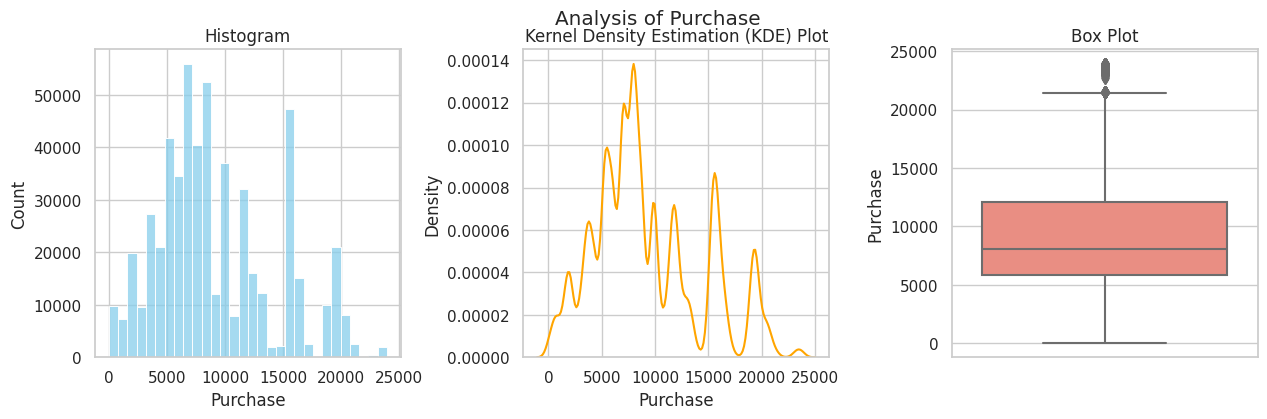

Skewness:  0.6001400037087128
Kurtosis:  -0.3383775655851702


In [20]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Analysis of Purchase')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.set_style('darkgrid')

# Plot Histogram
sns.histplot(df['Purchase'], kde=False, ax=axes[0], color='skyblue', bins=30)
axes[0].set_title('Histogram')

# Plot KDE Plot
sns.kdeplot(data=df['Purchase'], ax=axes[1], color='orange')
axes[1].set_title('Kernel Density Estimation (KDE) Plot')

# Plot Boxplot
sns.boxplot(y=df['Purchase'], ax=axes[2], color='salmon')
axes[2].set_title('Box Plot')

# Display the plots
plt.show()

# Display additional statistics
print('Skewness: ', df['Purchase'].skew())
print('Kurtosis: ', df['Purchase'].kurt())


### Interpretation of Skewness and Kurtosis

- **Skewness** suggests the data is somewhat right-skewed, with a tendency toward higher values.
- **Kurtosis** indicates that the data is less prone to extreme outliers than a normal distribution would be.


# Bivariate Analysis

In [21]:
df['User_ID'].nunique()

5891

In [22]:
# Creating and new df based  user_id and Total Purchase
user_purchase_sum = df.groupby('User_ID')['Purchase'].sum().reset_index()
user_purchase_sum.columns = ['User_ID', 'Total_Purchase']

In [23]:
# Sort by 'Total_Purchase' in descending order and select the top 20 users
top_20_users = user_purchase_sum.sort_values(by='Total_Purchase', ascending=False).head(20)
top_20_users.head(5)

,User_ID,Total_Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609


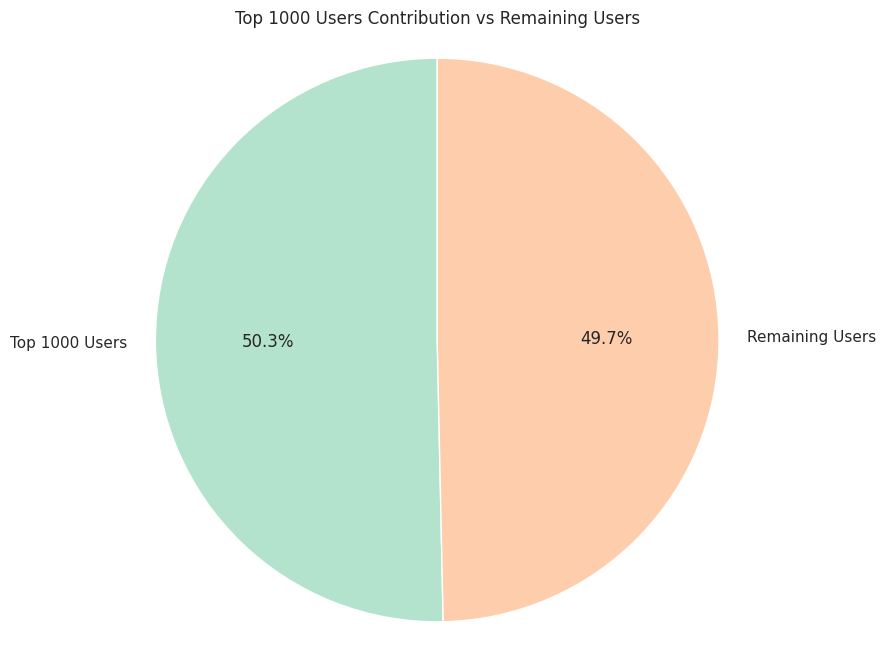

In [24]:
# Get the top 1000 users by purchase
top_1000_users = user_purchase_sum.nlargest(1000, 'Total_Purchase')

# Sum the total purchases for the top 1000 users
top_1000_sum = top_1000_users['Total_Purchase'].sum()

# Sum the total purchases for the remaining users
remaining_sum = user_purchase_sum['Total_Purchase'].sum() - top_1000_sum

# Create data for the pie chart
contributions = [top_1000_sum, remaining_sum]
labels = ['Top 1000 Users', 'Remaining Users']

# Plot a pie chart for top 1000 users vs remaining users' contribution
plt.figure(figsize=(8, 8))
plt.pie(contributions, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('Top 1000 Users Contribution vs Remaining Users')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


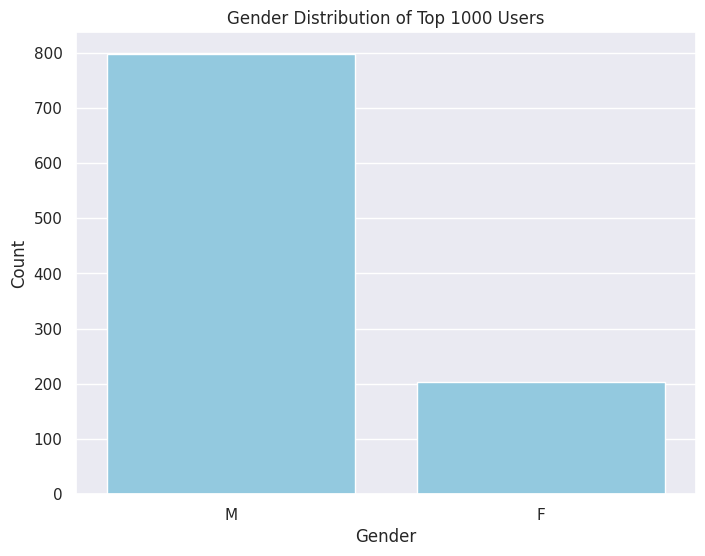

In [25]:
# Step 1: Group by User_ID and sum the purchases
user_purchase_sum = df.groupby('User_ID')['Purchase'].sum().reset_index()

# Step 2: Add the gender information to the aggregated user data
user_purchase_sum = user_purchase_sum.merge(df[['User_ID', 'Gender']].drop_duplicates(), on='User_ID', how='left')

# Step 3: Get the top 1000 users by total purchase
top_1000_users = user_purchase_sum.nlargest(1000, 'Purchase')

# Step 4: Count how many are male and how many are female in the top 1000 users
gender_count = top_1000_users['Gender'].value_counts()

M, F = gender_count

# Create a list of 'M' and 'F' based on their counts
gender_data = ['M'] * M + ['F'] * F  # Creating a list of 'M' and 'F'

# Convert the list to a pandas Series
gender_series = pd.Series(gender_data)

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=gender_series, color='skyblue')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Top 1000 Users')

# Show the plot
plt.show()


### Conclusion:

From the analysis, it is evident that the **top 1000 users contribute 50.3% of the total sales** out of **5891 unique user IDs**. This indicates a significant concentration of purchasing power within a relatively small portion of the user base. 

#### Key Insights:
- The **top 1000 users** contribute **50.3%** of the total purchases.
- The remaining **4891 users** contribute **49.7%** of the total purchases.
- This distribution follows the **Pareto Principle (80/20 rule)**, where a smaller proportion of users generates a disproportionately large amount of revenue.

#### Gender-Based Insights:
- Among the **top 1000 users**, **797 are male** and **203 are female**.
- **Male users** contribute the majority of the total purchases, but there is still a significant contribution from **female users**.

#### Implications:
- **Targeted Marketing**: Focus on the **top 1000 users** to maximize sales, as they contribute to over half of the total revenue.
- **Gender-Specific Engagement**: While **male users** dominate, **female users** still represent a substantial market segment, indicating an opportunity to improve female user engagement and increase their contribution to total sales.

In conclusion, leveraging insights from the **top 1000 users** and tailoring strategies for both male and female users could further boost sales and improve user retention.


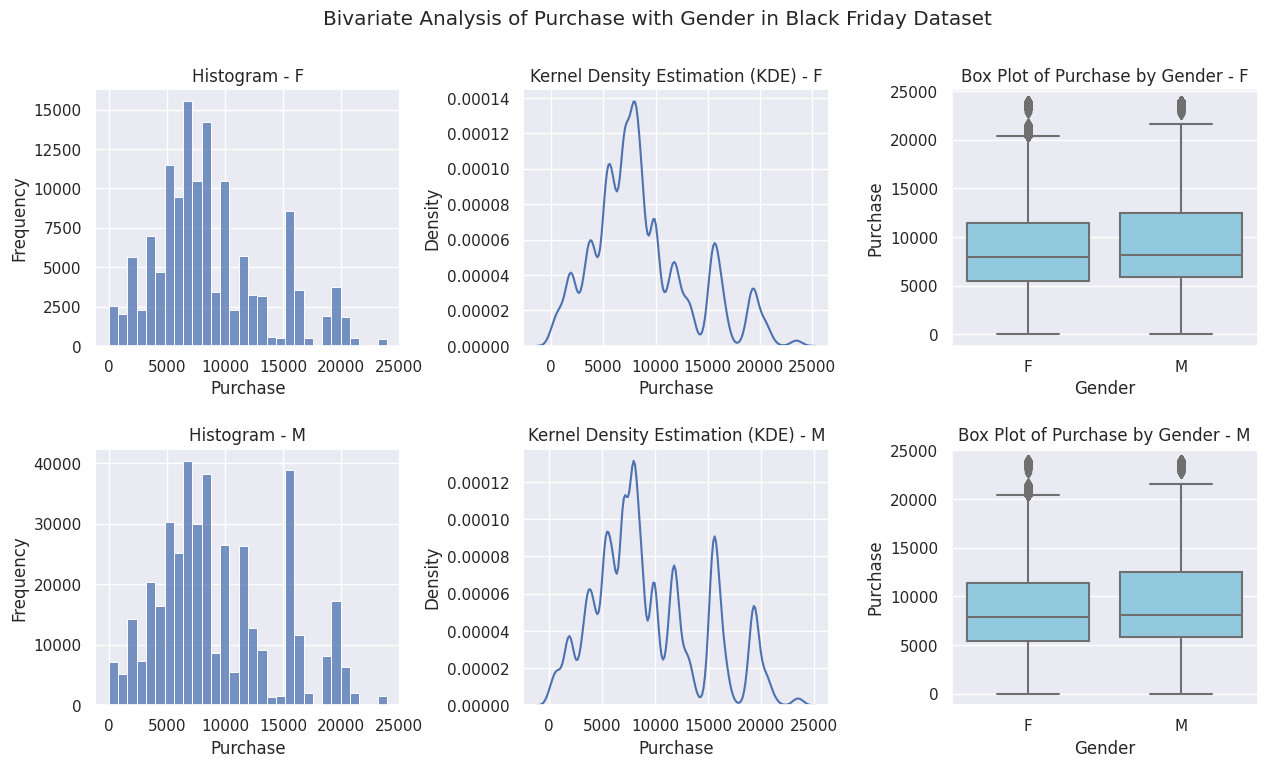

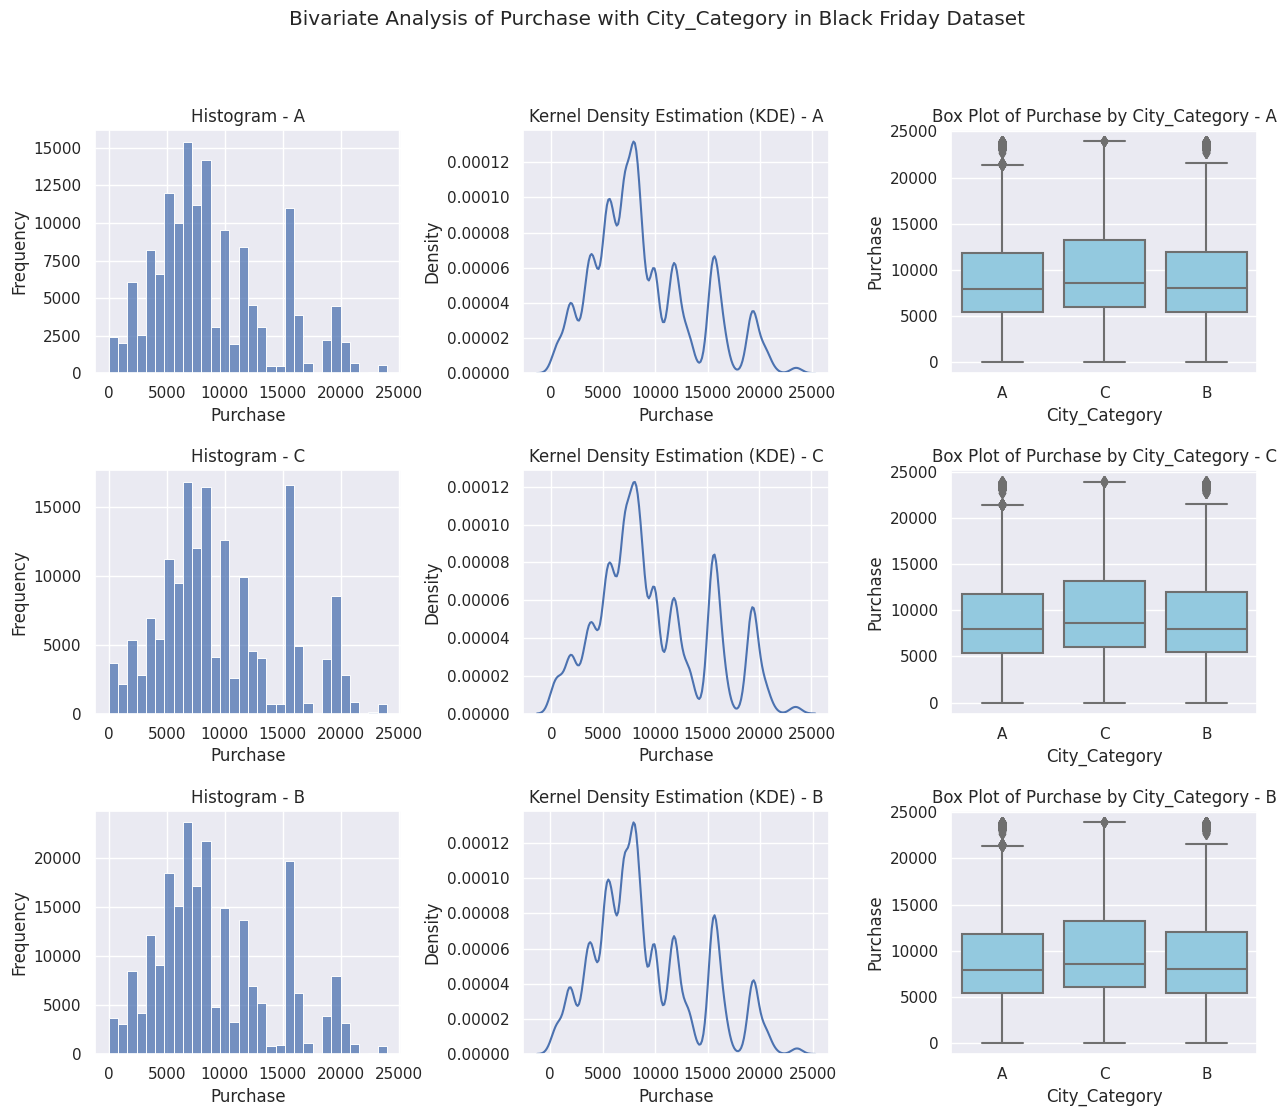

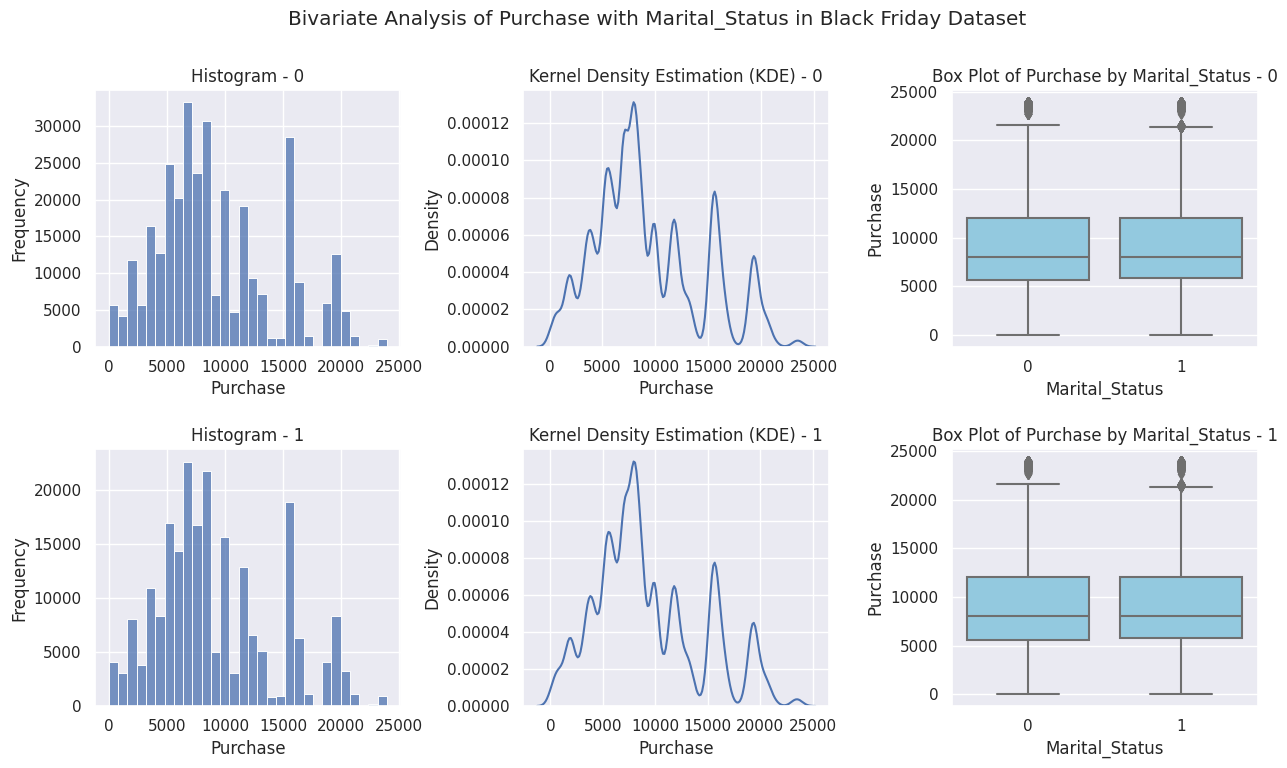

In [26]:
def plot_bivariate_analysis(feature):
    unique_values = df[feature].unique()
    num_values = len(unique_values)

    # Set up subplots
    fig, axes = plt.subplots(num_values, 3, figsize=(15, 4 * num_values))
    fig.suptitle(f'Bivariate Analysis of Purchase with {feature} in Black Friday Dataset')
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    sns.set_style('darkgrid')

    for idx, value in enumerate(unique_values):
        # Histogram
        sns.histplot(df.loc[df[feature] == value]['Purchase'], kde=False, ax=axes[idx, 0], label=value, bins=30 , palette='viridis' )
        axes[idx, 0].set_title(f'Histogram - {value}')
        axes[idx, 0].set_xlabel('Purchase')
        axes[idx, 0].set_ylabel('Frequency')

        # KDE Plot
        sns.kdeplot(data=df.loc[df[feature] == value]['Purchase'], ax=axes[idx, 1], label=value)
        axes[idx, 1].set_title(f'Kernel Density Estimation (KDE) - {value}')
        axes[idx, 1].set_xlabel('Purchase')
        axes[idx, 1].set_ylabel('Density')

        # Box Plot
        sns.boxplot(x=df[feature], y=df['Purchase'], ax=axes[idx, 2], color='skyblue')
        axes[idx, 2].set_title(f'Box Plot of Purchase by {feature} - {value}')
        axes[idx, 2].set_xlabel(f'{feature}')
        axes[idx, 2].set_ylabel('Purchase')

    plt.show()

# Example Usage:
plot_bivariate_analysis('Gender')
plot_bivariate_analysis('City_Category')
plot_bivariate_analysis('Marital_Status')


There is no variation in median of purchase for "Marital_Status"! , a less important feature for the variable purchase even the difference we saw it in the univariate analysis of the "Marital_Status" , a chance to drop this feature later

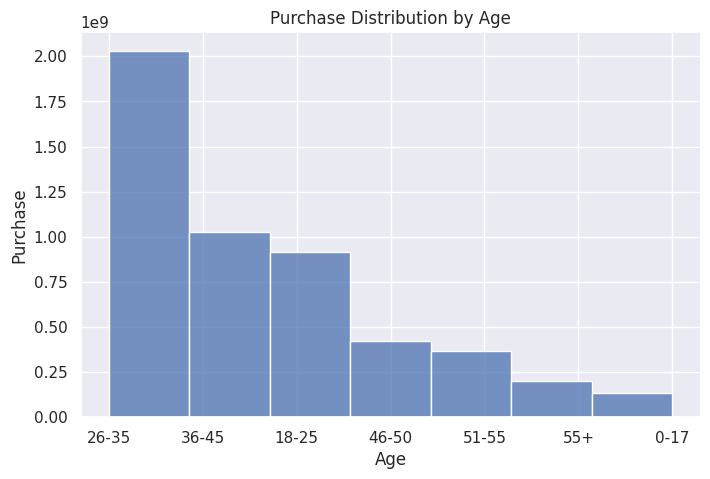

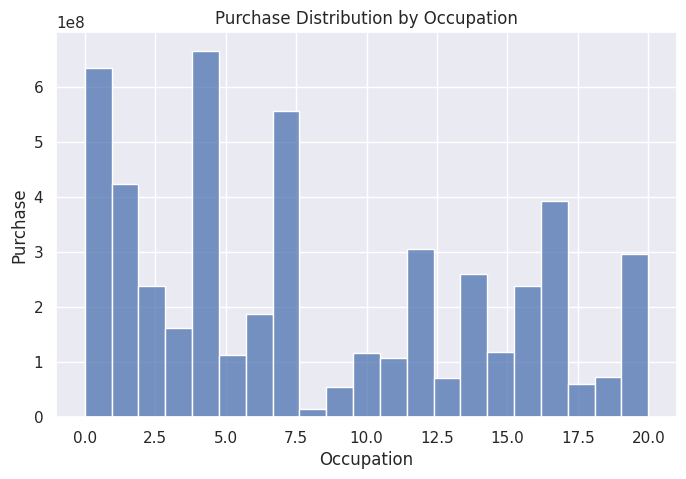

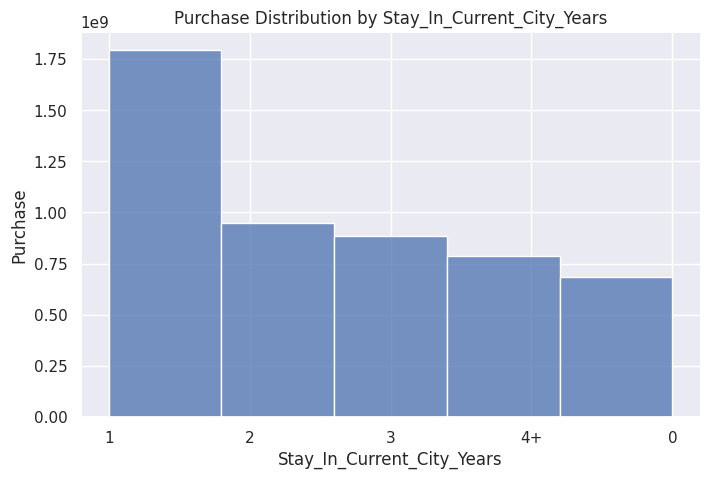

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to plot histograms separately with a more colorful palette and reduced size
def plot_purchase_histogram_separately(feature, df):
    # Ensure the feature exists in the DataFrame
    if feature not in df.columns:
        raise ValueError(f"{feature} not found in DataFrame columns")
    
    # Sort the DataFrame by 'Purchase' within each category
    sorted_df = df.groupby(feature)['Purchase'].sum().reset_index()
    sorted_df = sorted_df.sort_values('Purchase', ascending=False)
    
    # Create a separate histogram for each feature with reduced size
    plt.figure(figsize=(8, 5))  # Reduced figure size
    
    # Plot the histogram for the 'Purchase' values grouped by the feature's categories
    sns.histplot(sorted_df, x=feature, weights='Purchase', kde=False, discrete=False, bins=len(sorted_df), palette='viridis')
    
    # Set title and labels
    plt.title(f'Purchase Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Purchase')

    # Show the plot
    plt.show()

# Example Usage:
plot_purchase_histogram_separately('Age', df)
plot_purchase_histogram_separately('Occupation', df)
plot_purchase_histogram_separately('Stay_In_Current_City_Years', df)


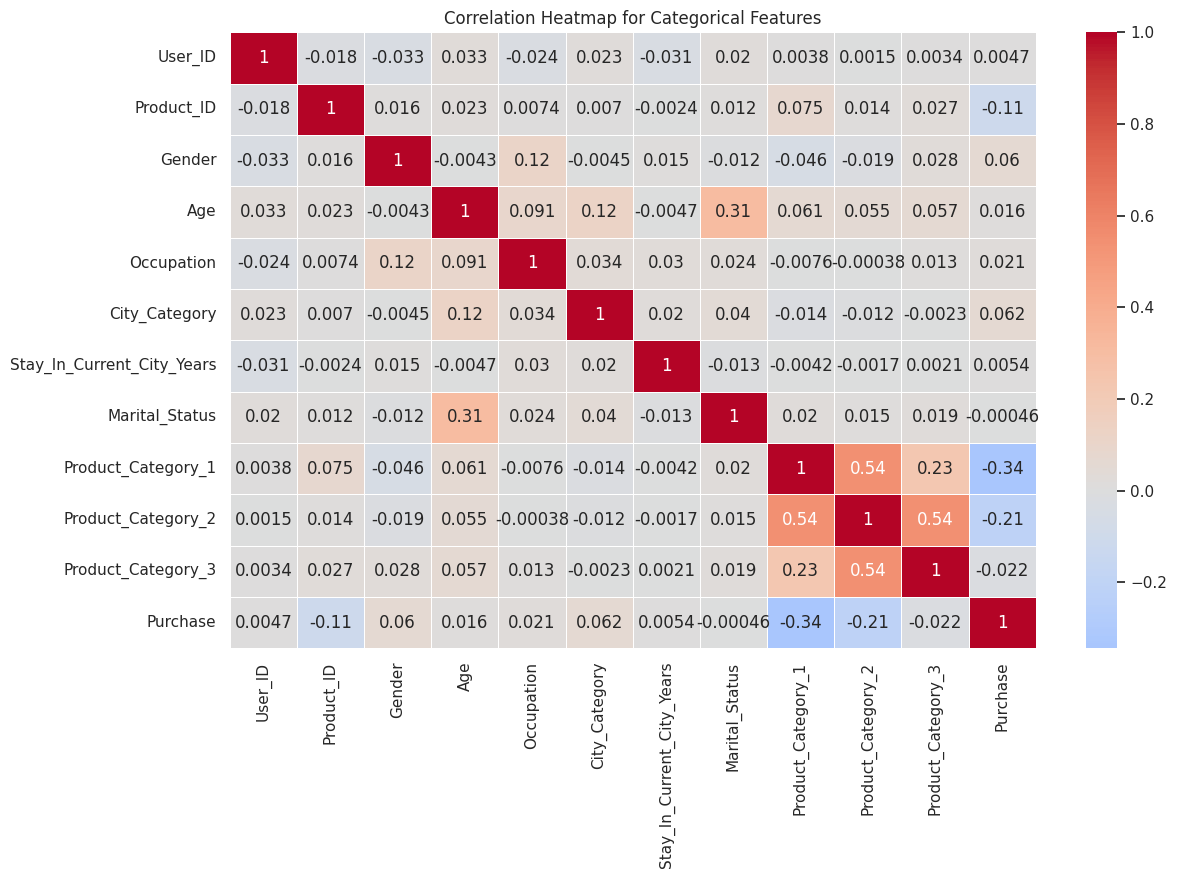

In [28]:
# Convert categorical columns to numerical codes
df_copy = df.copy()

columns_to_convert = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in columns_to_convert:
    df_copy[col] = df_copy[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = df_copy.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, center=0)
plt.title('Correlation Heatmap for Categorical Features')
plt.show()

### Conclusion: Correlation Analysis of Features with Purchase

From the correlation matrix, we observe the following:

1. **Features with Low Correlation to Purchase**:
   - **Marital_Status**: A very weak correlation (-0.00046) with **Purchase**, indicating marital status does not significantly affect purchasing behavior.
   - **Stay_In_Current_City_Years**: Shows minimal positive correlation (0.0054) with **Purchase**, suggesting no substantial impact of city stay duration on purchases.
   - **Gender**: A very weak positive correlation (0.0603) with **Purchase**, indicating minimal influence of gender on purchase behavior.

2. **Features with Weak Positive Correlation**:
   - **Age**: A slight positive correlation (0.0158) with **Purchase**, suggesting age may have a minimal effect on purchasing behavior.

3. **Product Categories**:
   - **Product_Category_1** has a moderate negative correlation (-0.3437) with **Purchase**, suggesting an inverse relationship.
   - **Product_Category_2** and **Product_Category_3** have weak negative correlations with **Purchase**, indicating these categories do not strongly influence purchase behavior.

4. **City_Category**: A weak positive correlation (0.0619) with **Purchase**, suggesting minimal impact of city category on purchases.

### Key Insights:
- **Marital_Status**, **Stay_In_Current_City_Years**, and **Gender** show little to no correlation with **Purchase** and may not be valuable features for predictive modeling.
- **Product_Category_1** shows the most notable negative correlation with **Purchase**, warranting further exploration to understand its effect on purchasing behavior.

### Recommendations:
- Consider **removing features like Marital_Status**, **Stay_In_Current_City_Years**, and **Gender** from the model to reduce dimensionality and improve efficiency.
- Further **analysis on product categories** is recommended to better understand their impact on purchases and refine the feature selection for predictive models.


# Data Modelling

In [29]:
df_clean = df.copy()

In [30]:
# Drop the column which has low co-relation with the Purchase
df_clean.drop(['User_ID', 'Product_ID','Stay_In_Current_City_Years','Marital_Status', 'Product_Category_3' , "Age" ], axis = 1, inplace = True)

In [31]:
df_clean.head()

,Gender,Occupation,City_Category,Product_Category_1,Product_Category_2,Purchase
0,F,10,A,3,NaN,8370
1,F,10,A,1,6.0,15200
2,F,10,A,12,NaN,1422
3,F,10,A,12,14.0,1057
4,M,16,C,8,NaN,7969


# Remove outliers

In [32]:
# Calculate the interquartile range (IQR)
q1 = df_clean['Purchase'].quantile(0.25)
q3 = df_clean['Purchase'].quantile(0.75)
iqr = q3 - q1

# Set the lower and upper bounds for outliers
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

# Remove outliers from the DataFrame
df_clean = df_clean.loc[(df_clean['Purchase'] > low) & (df_clean['Purchase'] < high)]

# Reset the index of the cleaned DataFrame
df_clean.reset_index(drop=True, inplace=True)


In [33]:
df_clean.shape

(547391, 6)

# impute missing value

In [34]:
#impute missing value
df_clean.isnull().sum()

Gender                     0
Occupation                 0
City_Category              0
Product_Category_1         0
Product_Category_2    173226
Purchase                   0
dtype: int64

In [35]:
columns_to_impute = ['Product_Category_2']

# Initialize the MICE imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply MICE imputation to the selected columns
df_clean[columns_to_impute] = mice_imputer.fit_transform(df_clean[columns_to_impute])

# Check if the missing values are filled
(df_clean.isnull().sum())


Gender                0
Occupation            0
City_Category         0
Product_Category_1    0
Product_Category_2    0
Purchase              0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
df_clean['Gender'] = label_encoder_gender.fit_transform(df_clean['Gender'])


label_encoder_city = LabelEncoder()
df_clean['City_Category'] = label_encoder_city.fit_transform(df_clean['City_Category'])

In [37]:
df_clean.head()

,Gender,Occupation,City_Category,Product_Category_1,Product_Category_2,Purchase
0,0,10,0,3,9.814082,8370
1,0,10,0,1,6.000000,15200
2,0,10,0,12,9.814082,1422
3,0,10,0,12,14.000000,1057
4,1,16,2,8,9.814082,7969


One Hot Encoding

In [38]:

df_clean_onehot = pd.get_dummies(df_clean , columns=["Product_Category_1" , "Product_Category_2" , "City_Category" , "Occupation"])
df_clean_onehot.shape

(547391, 64)

In [39]:
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = df_clean_onehot.drop("Purchase" , axis=1),df_clean_onehot['Purchase']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123)


In [40]:
model = xgb.XGBRegressor(n_estimators=800)
model.fit(X_train, y_train)
y_train_pred =  model.predict(X_train)
rmse_xg = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse_xg

2916.4590055994886

In [41]:
y_test_pred = model.predict(X_test)
rmse_xg_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse_xg_test

2970.3866348451816

##  Summary

This analysis explores customer behavior and purchase patterns during Black Friday sales, leveraging machine learning to predict purchase amounts. The study uncovered significant demographic insights and identified key predictive features influencing purchase behavior.

### Key Findings

#### Data Quality and Preprocessing
- **Complete Data**: Primary 9 columns had complete data.
- **Missing Data**:
    - `Product_Category_2` contained 31.57% null values, which were imputed.
    - `Product_Category_3` was dropped due to high percentage of missing values.
- **Dropped Features**: Based on correlation analysis, `User_ID`, `Product_ID`, `Stay_In_Current_City_Years` , `Gender` and `Marital_Status` were removed as they showed minimal predictive value.

#### Customer Demographics
- **Gender Distribution**:
    - Male shoppers significantly outnumber female shoppers.
    - Potential opportunity to increase female customer engagement.
  
- **Age Insights**:
    - Peak shopping demographic: 26-35 age group.
    - Suggests marketing focus on young professionals.
  
- **Geographic Patterns**:
    - City Category B showed the highest customer concentration.
    - One-year city residents formed the largest customer segment.
  
#### Purchase Behavior Analysis
- **Product Categories**: Distinct purchase value distributions observed across product categories.
- **Purchase Amounts**: Displayed a right-skewed distribution with notable outliers.
- **Marital Status**: No significant correlation with purchase amounts.
- **Stay Duration**: Minimal impact on purchase behavior.

### Model Performance
- **Model Used**: XGBoost Regression model.
- **Training RMSE**: 2916.459.
- **Testing RMSE**: 2970.387.
- The model demonstrated consistent performance across training and testing sets, indicating good generalization.

This study provides a comprehensive overview of customer behavior during Black Friday and offers actionable insights to optimize marketing strategies and improve future sales performance.


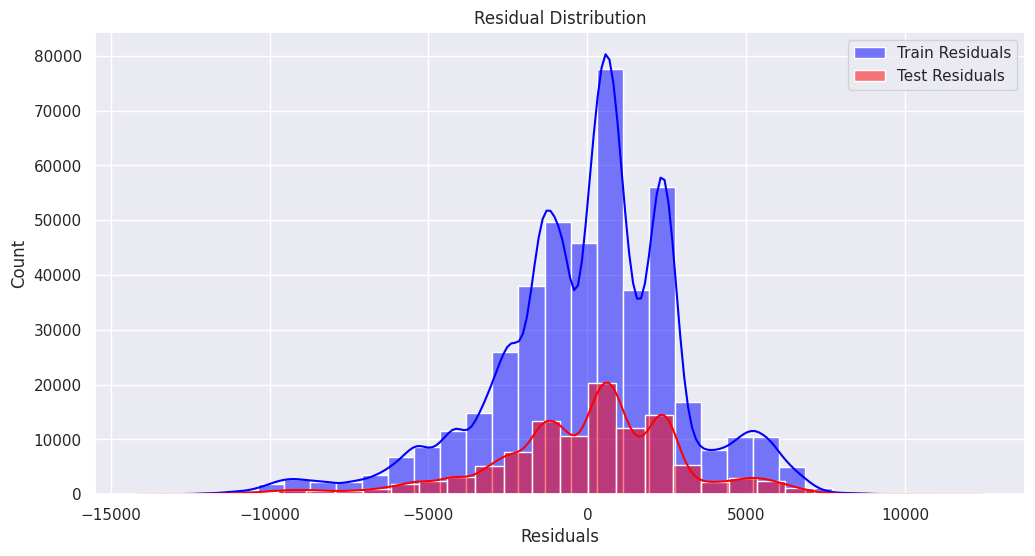

In [42]:
# Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(train_residuals, kde=True, color="blue", label="Train Residuals", bins=30)
sns.histplot(test_residuals, kde=True, color="red", label="Test Residuals", bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.legend()
plt.show()

### Model Residuals Analysis

The residuals for both the training and test datasets show similar shapes, indicating that the model is generalizing well and isn't severely overfitting. The comparable patterns in the residual distributions suggest that the model's performance is consistent across both the training and testing sets.

Key Observations:
- **Training Residuals (Blue)**: The frequency of training residuals is higher, which is typical as training datasets are usually larger.
- **Test Residuals**: The test residuals exhibit a similar distribution, suggesting that the model has not memorized the training data and can generalize well to unseen data.

These observations support the model's reliability in making predictions for both the training and test data, confirming that the model isn't overfitting and can generalize effectively to new data.


### Business Recommendations

#### Targeted Marketing
- **Focus campaigns on the 26-35 age demographic**: This group represents the largest segment of Black Friday shoppers, so creating targeted promotions will likely yield the best results.
- **Develop strategies to attract more female shoppers**: As male shoppers significantly outnumber females, marketing strategies tailored to women could help balance the customer base and increase female shopper engagement.
- **Concentrate resources on City Category B**: City Category B has the highest concentration of customers, making it a prime target for location-based promotions and discounts.

#### Product Strategy
- **Optimize product categories based on distinct purchase patterns**: Analyze product category preferences and prioritize stocking and promoting the most popular and profitable categories.
- **Consider price points that align with observed purchase distributions**: Price-sensitive shoppers, especially in the 26-35 age range, may respond better to discounts that offer real value. Pricing strategies should be aligned with purchase behavior and demand trends.

#### Customer Segmentation
- **Prioritize marketing to new city residents (1-year stay duration)**: New residents are more likely to engage in Black Friday shopping, so developing targeted campaigns for this group could yield higher conversion rates.
- **Develop specific strategies for high-value product categories**: Target customers who are more likely to purchase high-value items and offer exclusive deals or bundles.

#### Omnichannel Engagement
- **Multichannel Approach**: Implement an **omnichannel marketing strategy** to engage shoppers across various platforms. This includes combining **social media**, **email campaigns**, **in-store promotions**, and **website ads** to target diverse shopping preferences.
- **Personalized Recommendations**: Leverage data analytics to provide **personalized product recommendations** to customers based on their demographic profile, shopping habits, and purchase history.
- **Mobile Engagement**: Given the growing trend in mobile shopping, focus on improving **mobile shopping experiences**, including easy navigation, fast checkout, and targeted promotions.

#### Customer Retention Strategies
- **Post-Sale Engagement**: After Black Friday, implement **customer retention strategies** like **loyalty programs** or **exclusive discounts** to keep shoppers engaged and encourage repeat business.
- **Exclusive Offers for Frequent Shoppers**: Provide **early access to sales or exclusive discounts** for c
